<a href="https://colab.research.google.com/github/ParasNandwani/Deeplearning/blob/master/CV/cnn_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,GlobalMaxPooling2D
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import RMSprop,Adam
import tensorflow as tf
import matplotlib.pyplot as plt

#Sequntial is class of model

In [10]:
a= np.random.randint(0,256,size=10*224*224*3,dtype=int)
a=a.reshape((10,224,224,3))#
a.shape

(10, 224, 224, 3)

In [14]:
a[0][0][0][2]

217

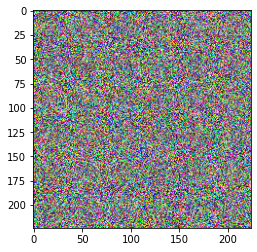

In [7]:
plt.imshow(a[0])

In [15]:
y=[0,1,2,1,0,2,1,0,1,0]#multi classification problem with 3 classes

In [16]:
y_cat=tf.keras.utils.to_categorical(y)

In [19]:
y_cat

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [22]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding="SAME",activation='relu',batch_input_shape=(None,224,224,3)))
#why first paramater is none is for I can define batch size later not to expect predefined no of images
model.add(Conv2D(filters=32,kernel_size=(5,5),padding="SAME",activation='relu',batch_input_shape=(None,224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=63,kernel_size=(3,3),padding="SAME",activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="SAME",activation='relu'))
model.add(GlobalMaxPooling2D())
model.add(Dense(3,activation='softmax'))


In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      2432      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 63)      18207     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 32)      18176     
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                

In [24]:
opt=Adam()#optimerr to make gradient descent more powerful

In [27]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=opt,metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      2432      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 63)      18207     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 32)      18176     
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                

In [29]:
model.fit(a,y_cat,epochs=20,validation_split=0.2)

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 38.1979 - accuracy: 0.3750 - val_loss: 37.1325 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 24.1360 - accuracy: 0.2500 - val_loss: 35.8024 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 37.5243 - accuracy: 0.3750 - val_loss: 23.9569 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 24.3773 - accuracy: 0.3750 - val_loss: 8.3410 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 8.1909 - accuracy: 0.3750 - val_loss: 12.2740 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 4.1919 - accuracy: 0.5000 - val_loss: 11.8933 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 8.9889 - accuracy: 0.3750 - val_loss: 12.7090 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=======

In [32]:
model.predict(a)

array([[9.9975532e-01, 1.5575092e-04, 8.8951710e-05],
       [1.8087143e-01, 8.1887478e-01, 2.5382571e-04],
       [2.8662102e-03, 5.3682690e-03, 9.9176556e-01],
       [2.3630279e-01, 7.6101929e-01, 2.6779461e-03],
       [9.9963164e-01, 3.4222088e-04, 2.6152135e-05],
       [9.4773131e-04, 1.0123605e-02, 9.8892862e-01],
       [6.0082264e-03, 9.9351162e-01, 4.8014292e-04],
       [9.9964511e-01, 3.4545310e-04, 9.3848021e-06],
       [8.9535904e-01, 1.0004683e-01, 4.5941221e-03],
       [6.9062787e-01, 2.8543758e-01, 2.3934497e-02]], dtype=float32)